In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
import pylab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
weather_data = pd.read_csv('/content/drive/MyDrive/Capstone_ML_Guild/Capstone/Time_Series_Analysis_for_Weather/Weather_TimeSeries.csv')

In [3]:
df_city = weather_data.loc[weather_data['State'] == 'MADHYA PRADESH'][weather_data['District'] == 'GWALIOR'].copy()
df_city = df_city.sort_values(by=['Year', 'Month'])

df_preci = pd.DataFrame(columns=['Date', 'Preci'])
df_preci['Date'] = pd.to_datetime(df_city['Year'].astype(str) + '-' + df_city['Month'].astype(str) + '-1')
df_preci['Preci'] = df_city['Precipitation'].copy()
df_preci.set_index('Date', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [4]:
df_preci.loc[df_preci['Preci'] <= 0]

,Preci
Date,
1983-11-01,0.0
1984-03-01,0.0
1985-11-01,0.0
1989-04-01,0.0
1992-12-01,0.0
1993-11-01,0.0
1993-12-01,0.0
1994-12-01,0.0
1996-11-01,0.0


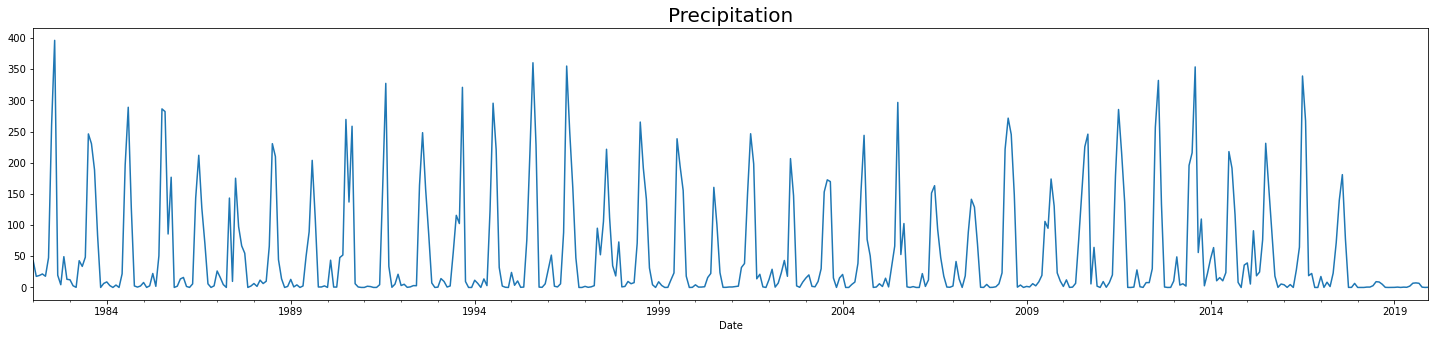

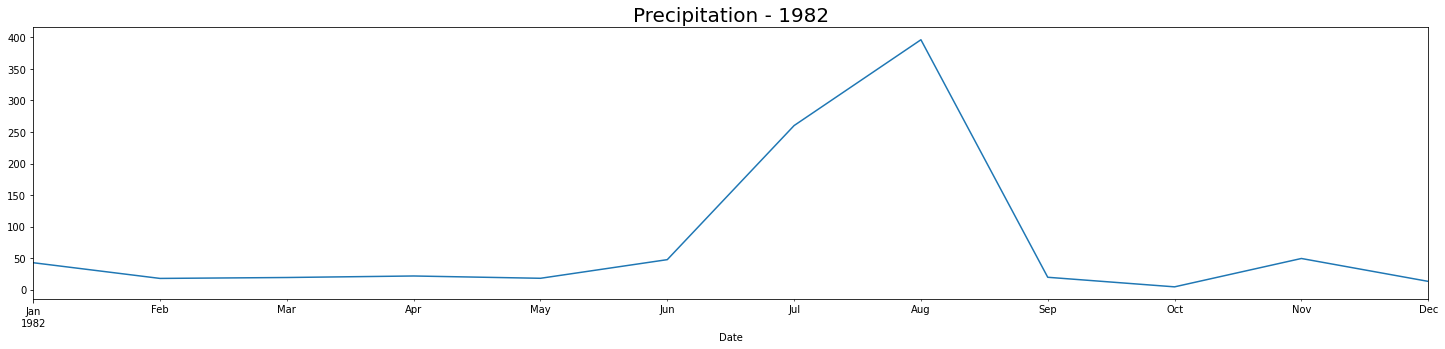

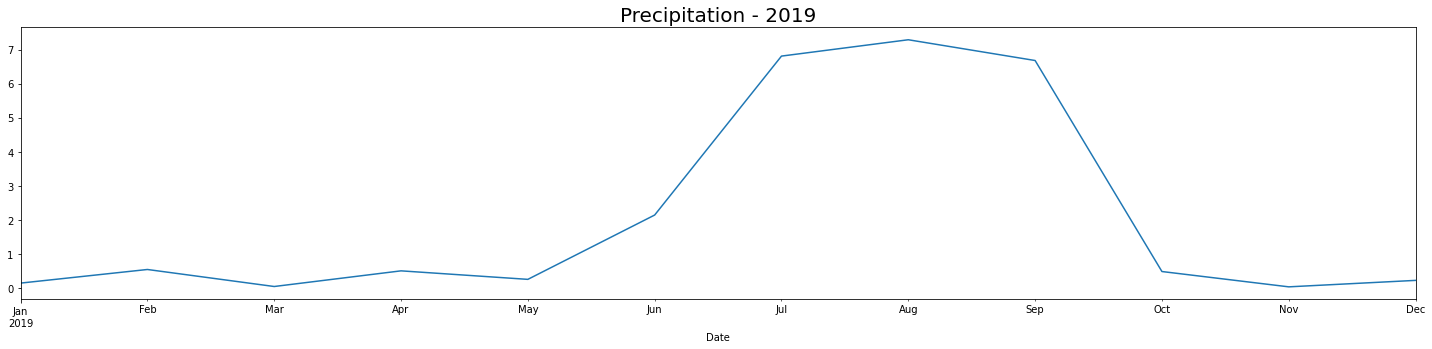

In [5]:
df_preci['Preci'].plot(figsize=(25,5))
plt.title('Precipitation', size=20)
plt.show()

df_preci['Preci'].loc['1982'].plot(figsize=(25,5))
plt.title('Precipitation - 1982', size=20)
plt.show()

df_preci['Preci'].loc['2019'].plot(figsize=(25,5))
plt.title('Precipitation - 2019', size=20)
plt.show()

In [6]:
# Train/Test split
df_test = df_preci.iloc[-56:] # Test data
df = df_preci.iloc[:-56]

In [7]:
df.describe()

,Preci
count,400.000000
mean,58.172050
std,86.534962
min,0.000000
25%,1.562500
50%,12.815000
75%,85.590000
max,396.330000


## Stationarity

In [8]:
sts.adfuller(df.Preci)

(-3.8044822980094373,
 0.0028617867157465383,
 12,
 387,
 {'1%': -3.447360865754795,
  '10%': -2.5707639493486636,
  '5%': -2.8690374364690445},
 4105.799081488454)

Test suggests that the TS has stationarity with 99% confidence.

## Seasonality

<Figure size 2160x720 with 0 Axes>

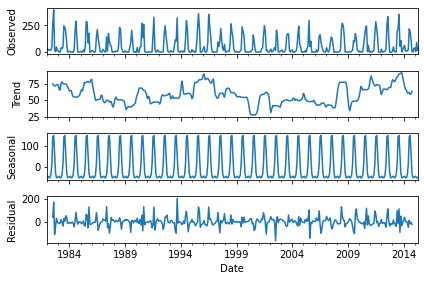

In [9]:
## Seasonality
plt.figure(figsize=(30,10))
s_dec_multiplicative = seasonal_decompose(df.Preci, model = "additive")
s_dec_multiplicative.plot()
plt.show()

## ACF

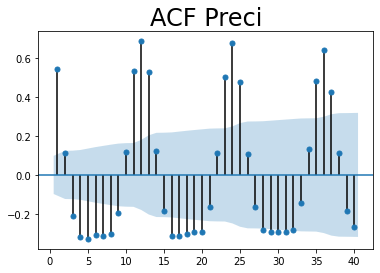

In [10]:
sgt.plot_acf(df.Preci, lags = 40, zero = False)
plt.title("ACF Preci", size = 24)
plt.show()

## PACF

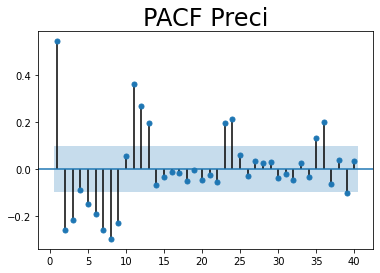

In [11]:
sgt.plot_pacf(df.Preci, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Preci", size = 24)
plt.show()

## Try out Models

In [12]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [13]:
def LLR_test(mod_1, mod_2, DF=1):
  # L1 = mod_1.fit().llf
  # L2 = mod_2.fit().llf
  # LR = (2*(L2-L1))
  # p = chi2.sf(LR, DF).round(3)
  p = chi2.sf(mod_2.llf - mod_1.llf, DF).round(3)
  return p

### Simple AR Model

In [14]:
model_ar_1 = ARMA(df.Preci, order=(1,0))
results_ar_1 = model_ar_1.fit()
print(results_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(1, 0)   Log Likelihood               -2281.537
Method:                       css-mle   S.D. of innovations             72.564
Date:                Fri, 27 Nov 2020   AIC                           4569.075
Time:                        13:48:33   BIC                           4581.049
Sample:                    01-01-1982   HQIC                          4573.817
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.0098      7.899      7.344      0.000      42.528      73.491
ar.L1.Preci     0.5420      0.042     12.937      0.000       0.460       0.624
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [15]:
model_ar_2 = ARMA(df.Preci, order=(2,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(2, 0)   Log Likelihood               -2267.518
Method:                       css-mle   S.D. of innovations             70.053
Date:                Fri, 27 Nov 2020   AIC                           4543.035
Time:                        13:48:33   BIC                           4559.001
Sample:                    01-01-1982   HQIC                          4549.358
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.0797      6.074      9.562      0.000      46.174      69.985
ar.L1.Preci     0.6836      0.048     14.170      0.000       0.589       0.778
ar.L2.Preci    -0.2598      0.048     -5.392    

In [16]:
model_ar_3 = ARMA(df.Preci, order=(3,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(3, 0)   Log Likelihood               -2257.849
Method:                       css-mle   S.D. of innovations             68.367
Date:                Fri, 27 Nov 2020   AIC                           4525.698
Time:                        13:48:33   BIC                           4545.655
Sample:                    01-01-1982   HQIC                          4533.601
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.1933      4.880     11.925      0.000      48.629      67.758
ar.L1.Preci     0.6263      0.049     12.837      0.000       0.531       0.722
ar.L2.Preci    -0.1103      0.058     -1.909    

In [17]:
model_ar_4 = ARMA(df.Preci, order=(4,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(4, 0)   Log Likelihood               -2256.230
Method:                       css-mle   S.D. of innovations             68.088
Date:                Fri, 27 Nov 2020   AIC                           4524.460
Time:                        13:48:33   BIC                           4548.408
Sample:                    01-01-1982   HQIC                          4533.944
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.2306      4.463     13.047      0.000      49.483      66.978
ar.L1.Preci     0.6067      0.050     12.185      0.000       0.509       0.704
ar.L2.Preci    -0.1206      0.058     -2.085    

In [18]:
LLR_test(results_ar_2, results_ar_3)

0.002

In [19]:
# Residuals
df_ar_resid = pd.DataFrame(results_ar_3.resid, columns=['Preci'])

In [20]:
df_ar_resid['Preci'].mean()

-0.045930622069792065

In [21]:
df_ar_resid['Preci'].var() ** (0.5)

68.45683485124331

In [22]:
sts.adfuller(df_ar_resid['Preci'])

(-4.282811744171629,
 0.00047566190430137,
 17,
 382,
 {'1%': -3.4475850438570115,
  '10%': -2.5708164748773332,
  '5%': -2.869135963767125},
 4111.194592896563)

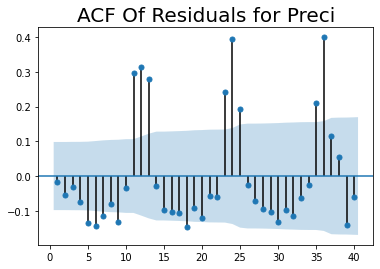

In [23]:
sgt.plot_acf(df_ar_resid['Preci'], zero = False, lags = 40)
plt.title("ACF Of Residuals for Preci",size=20)
plt.show()

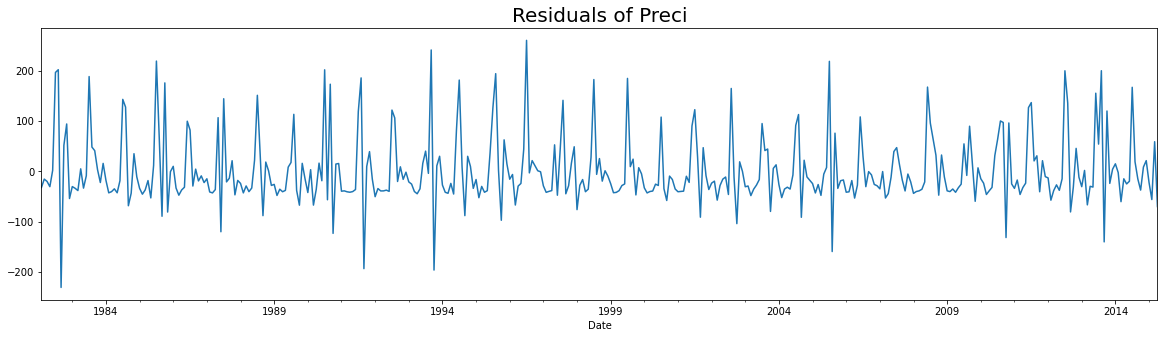

In [24]:
df_ar_resid['Preci'][1:].plot(figsize=(20,5))
plt.title("Residuals of Preci",size=20)
plt.show()

### MA and ARMA Model

In [25]:
model_ma_1 = ARMA(df['Preci'], order=(0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(0, 1)   Log Likelihood               -2285.284
Method:                       css-mle   S.D. of innovations             73.251
Date:                Fri, 27 Nov 2020   AIC                           4576.567
Time:                        13:48:34   BIC                           4588.541
Sample:                    01-01-1982   HQIC                          4581.309
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.0833      5.520     10.522      0.000      47.264      68.902
ma.L1.Preci     0.5084      0.035     14.510      0.000       0.440       0.577
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [73]:
model_ma_2 = ARMA(df['Preci'], order=(0,2))
results_ma_2 = model_ma_2.fit()
print(results_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(0, 2)   Log Likelihood               -2268.245
Method:                       css-mle   S.D. of innovations             70.181
Date:                Fri, 27 Nov 2020   AIC                           4544.490
Time:                        14:02:25   BIC                           4560.456
Sample:                    01-01-1982   HQIC                          4550.813
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.0552      6.838      8.490      0.000      44.653      71.458
ma.L1.Preci     0.6459      0.046     14.011      0.000       0.556       0.736
ma.L2.Preci     0.3059      0.048      6.352    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [75]:
LLR_test(results_ma_1, results_ma_2)

0.0

In [27]:
model_arma_2_2 = ARMA(df['Preci'], order=(2,2))
results_arma_2_2 = model_arma_2_2.fit()
print(results_arma_2_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_1, results_arma_2_2, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(2, 2)   Log Likelihood               -2238.759
Method:                       css-mle   S.D. of innovations             65.140
Date:                Fri, 27 Nov 2020   AIC                           4489.518
Time:                        13:48:34   BIC                           4513.466
Sample:                    01-01-1982   HQIC                          4499.002
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.2566      2.090     27.878      0.000      54.161      62.352
ar.L1.Preci     1.4253      0.061     23.381      0.000       1.306       1.545
ar.L2.Preci    -0.7154      0.057    -12.539    

In [28]:
model_arma_2_1 = ARMA(df['Preci'], order=(2,1))
results_arma_2_1 = model_arma_2_1.fit()
print(results_arma_2_1.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_1, results_arma_2_1)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(2, 1)   Log Likelihood               -2239.699
Method:                       css-mle   S.D. of innovations             65.298
Date:                Fri, 27 Nov 2020   AIC                           4489.397
Time:                        13:48:35   BIC                           4509.355
Sample:                    01-01-1982   HQIC                          4497.301
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.2175      2.121     27.454      0.000      54.061      62.374
ar.L1.Preci     1.3610      0.042     32.628      0.000       1.279       1.443
ar.L2.Preci    -0.6520      0.038    -17.354    

In [29]:
model_arma_1_2 = ARMA(df['Preci'], order=(1,2))
results_arma_1_2 = model_arma_1_2.fit()
print(results_arma_1_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_1, results_arma_1_2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(1, 2)   Log Likelihood               -2279.379
Method:                       css-mle   S.D. of innovations             72.166
Date:                Fri, 27 Nov 2020   AIC                           4568.758
Time:                        13:48:35   BIC                           4588.715
Sample:                    01-01-1982   HQIC                          4576.661
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9556      2.527     22.935      0.000      53.003      62.908
ar.L1.Preci     0.8135      0.050     16.377      0.000       0.716       0.911
ma.L1.Preci    -0.3835      0.048     -7.961    

In [30]:
model_arma_3_3 = ARMA(df['Preci'], order=(3,3))
results_arma_3_3 = model_arma_3_3.fit()
print(results_arma_3_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_1, results_arma_3_3, 3)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(3, 3)   Log Likelihood               -2204.202
Method:                       css-mle   S.D. of innovations             59.106
Date:                Fri, 27 Nov 2020   AIC                           4424.404
Time:                        13:48:43   BIC                           4456.336
Sample:                    01-01-1982   HQIC                          4437.049
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.9215      3.714     15.864      0.000      51.642      66.201
ar.L1.Preci     1.6736      0.007    239.998      0.000       1.660       1.687
ar.L2.Preci    -0.8998      0.012    -74.930    

In [31]:
model_arma_3_1 = ARMA(df['Preci'], order=(3,1))
results_arma_3_1 = model_arma_3_1.fit(start_ar_lags=1)
print(results_arma_3_1.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_3_1, results_arma_3_3, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(3, 1)   Log Likelihood               -2238.971
Method:                       css-mle   S.D. of innovations             65.176
Date:                Fri, 27 Nov 2020   AIC                           4489.942
Time:                        13:48:43   BIC                           4513.891
Sample:                    01-01-1982   HQIC                          4499.426
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.2441      2.102     27.711      0.000      54.124      62.364
ar.L1.Preci     1.3077      0.061     21.605      0.000       1.189       1.426
ar.L2.Preci    -0.5618      0.083     -6.770    

In [32]:
model_arma_3_2 = ARMA(df['Preci'], order=(3,2))
results_arma_3_2 = model_arma_3_2.fit()
print(results_arma_3_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_3_2, results_arma_3_3, 1)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(3, 2)   Log Likelihood               -2211.340
Method:                       css-mle   S.D. of innovations             60.246
Date:                Fri, 27 Nov 2020   AIC                           4436.680
Time:                        13:48:44   BIC                           4464.620
Sample:                    01-01-1982   HQIC                          4447.744
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.0042      3.628     16.263      0.000      51.893      66.115
ar.L1.Preci     2.0406      0.048     42.481      0.000       1.946       2.135
ar.L2.Preci    -1.5309      0.083    -18.355    

In [91]:
model_arma_1_3 = ARMA(df['Preci'], order=(1,3))
results_arma_1_3 = model_arma_1_3.fit()
print(results_arma_1_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_3, results_arma_3_3, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(1, 3)   Log Likelihood               -2254.412
Method:                       css-mle   S.D. of innovations             67.777
Date:                Fri, 27 Nov 2020   AIC                           4520.825
Time:                        14:12:50   BIC                           4544.773
Sample:                    01-01-1982   HQIC                          4530.309
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.0218      2.389     24.291      0.000      53.340      62.703
ar.L1.Preci     0.6870      0.058     11.845      0.000       0.573       0.801
ma.L1.Preci    -0.1651      0.061     -2.690    

In [94]:
model_arma_2_3 = ARMA(df['Preci'], order=(2,3))
results_arma_2_3 = model_arma_2_3.fit()
print(results_arma_2_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_3, results_arma_3_3)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(2, 3)   Log Likelihood               -2214.739
Method:                       css-mle   S.D. of innovations        1649622.969
Date:                Fri, 27 Nov 2020   AIC                           4443.479
Time:                        14:14:41   BIC                           4471.419
Sample:                    01-01-1982   HQIC                          4454.544
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.4953      0.043   1399.401      0.000      60.411      60.580
ar.L1.Preci     1.7328      0.001   1399.324      0.000       1.730       1.735
ar.L2.Preci    -1.0000        nan        nan    

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountere

In [33]:
model_arma_3_4 = ARMA(df['Preci'], order=(3,4))
results_arma_3_4 = model_arma_3_4.fit()
print(results_arma_3_4.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_3_2, results_arma_3_4, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(3, 4)   Log Likelihood               -2203.989
Method:                       css-mle   S.D. of innovations             59.082
Date:                Fri, 27 Nov 2020   AIC                           4425.977
Time:                        13:48:46   BIC                           4461.900
Sample:                    01-01-1982   HQIC                          4440.203
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.9455      3.571     16.507      0.000      51.947      65.944
ar.L1.Preci     1.1974      0.256      4.672      0.000       0.695       1.700
ar.L2.Preci    -0.0719      0.444     -0.162    

In [100]:
model_arma_2_4 = ARMA(df['Preci'], order=(2,4))
results_arma_2_4 = model_arma_2_4.fit()
print(results_arma_2_4.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_4, results_arma_3_4, 1)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(2, 4)   Log Likelihood               -2203.195
Method:                       css-mle   S.D. of innovations             59.019
Date:                Fri, 27 Nov 2020   AIC                           4422.390
Time:                        14:25:56   BIC                           4454.322
Sample:                    01-01-1982   HQIC                          4435.035
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.8036      3.026     19.764      0.000      53.873      65.734
ar.L1.Preci     1.7316      0.001   2890.198      0.000       1.730       1.733
ar.L2.Preci    -0.9999      0.000  -5845.329    

In [87]:
# model_arma_4_4 = ARMA(df['Preci'], order=(4,4))
# results_arma_4_4 = model_arma_4_4.fit(start_ar_lags=1)
# print(results_arma_4_4.summary())
# print("\nLLR test p-value = " + str(LLR_test(results_arma_3_2, results_arma_4_4, 3)))

In [80]:
model_arma_4_3 = ARMA(df['Preci'], order=(4,3))
results_arma_4_3 = model_arma_4_3.fit(start_ar_lags=1)
print(results_arma_4_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_3_2, results_arma_4_3, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Preci   No. Observations:                  400
Model:                     ARMA(4, 3)   Log Likelihood               -2236.518
Method:                       css-mle   S.D. of innovations             64.500
Date:                Fri, 27 Nov 2020   AIC                           4491.036
Time:                        14:08:09   BIC                           4526.959
Sample:                    01-01-1982   HQIC                          4505.262
                         - 04-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.2128      2.119     27.468      0.000      54.059      62.366
ar.L1.Preci    -0.4851      0.043    -11.241      0.000      -0.570      -0.401
ar.L2.Preci     0.8859      0.056     15.848    

In [105]:
df_arma_resid = pd.DataFrame(results_arma_2_4.resid, columns=['Preci'])

In [106]:
df_arma_resid['Preci'].mean()

-1.1609526852542416

In [107]:
df_arma_resid['Preci'].var() ** (1/2)

59.866961242417055

In [108]:
sts.adfuller(df_arma_resid['Preci'])

(-4.45114140261865,
 0.00024072134266848048,
 13,
 386,
 {'1%': -3.447405233596701,
  '10%': -2.5707743450830893,
  '5%': -2.8690569369014605},
 4080.244375777355)

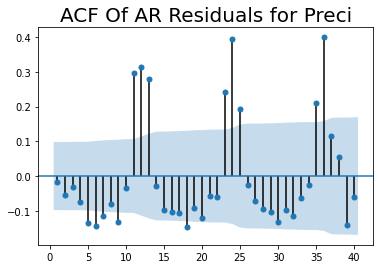

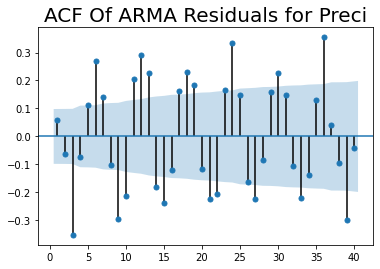

In [109]:
sgt.plot_acf(df_ar_resid['Preci'], zero = False, lags = 40)
plt.title("ACF Of AR Residuals for Preci",size=20)
plt.show()

sgt.plot_acf(df_arma_resid['Preci'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Preci",size=20)
plt.show()

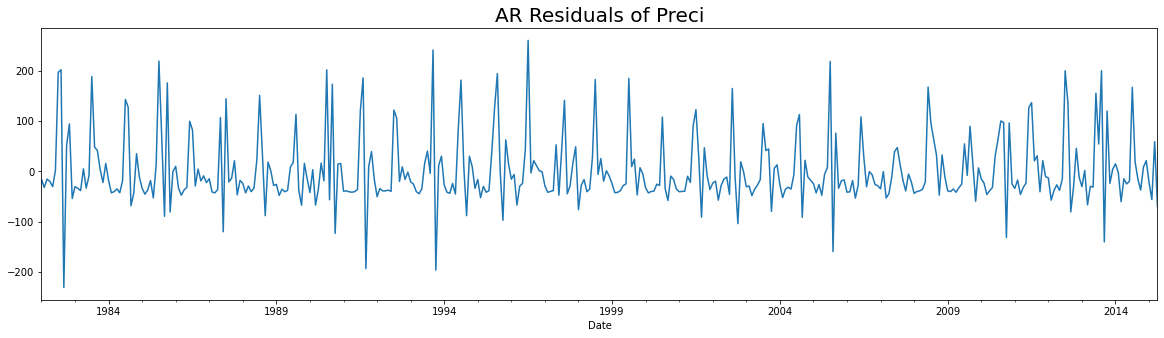

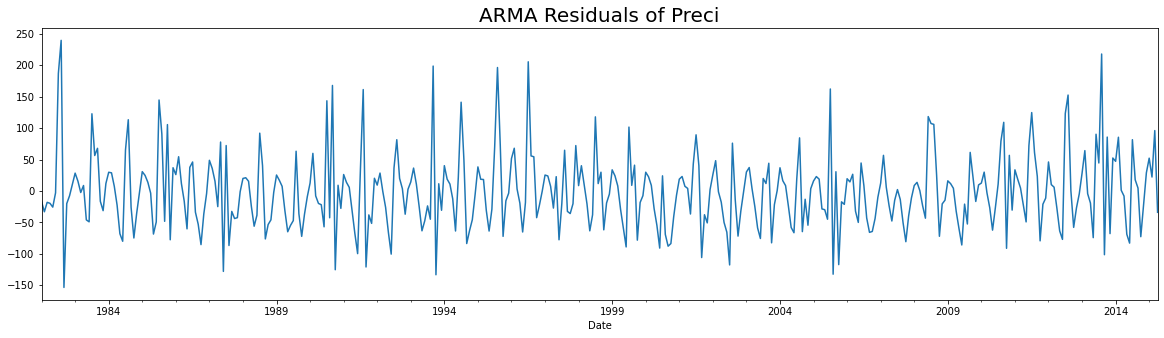

In [110]:
df_ar_resid['Preci'].plot(figsize=(20,5))
plt.title("AR Residuals of Preci",size=20)
plt.show()

df_arma_resid['Preci'].plot(figsize=(20,5))
plt.title("ARMA Residuals of Preci",size=20)
plt.show()

### SARIMAX Model

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
model_sarimax_1 = SARIMAX(df['Preci'], order=(1,0,1), seasonal_order = (1,0,1,12))
results_sarimax_1 = model_sarimax_1.fit()
print(results_sarimax_1.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -2124.324
Date:                            Fri, 27 Nov 2020   AIC                           4258.648
Time:                                    13:48:51   BIC                           4278.605
Sample:                                01-01-1982   HQIC                          4266.551
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9491      0.036    -26.249      0.000      -1.020      -0.878
ma.L1          0.9891      0.024   

In [43]:
model_sarimax_2 = SARIMAX(df['Preci'], order=(2,0,1), seasonal_order = (1,0,1,12))
results_sarimax_2 = model_sarimax_2.fit()
print(results_sarimax_2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -2123.119
Date:                            Fri, 27 Nov 2020   AIC                           4258.238
Time:                                    13:48:54   BIC                           4282.187
Sample:                                01-01-1982   HQIC                          4267.722
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0722      0.051     20.998      0.000       0.972       1.172
ar.L2         -0.0874      0.006   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
LLR_test(results_sarimax_1, results_sarimax_2, 1)

0.272

In [45]:
model_sarimax_3 = SARIMAX(df['Preci'], order=(1,1,1), seasonal_order = (1,0,1,12))
results_sarimax_3 = model_sarimax_3.fit()
print(results_sarimax_3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2120.165
Date:                            Fri, 27 Nov 2020   AIC                           4250.329
Time:                                    13:48:58   BIC                           4270.274
Sample:                                01-01-1982   HQIC                          4258.228
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1011      0.003     29.477      0.000       0.094       0.108
ma.L1         -0.9846      0.014   

In [46]:
LLR_test(results_sarimax_1, results_sarimax_3, 1)

0.041

In [47]:
model_sarimax_4 = SARIMAX(df['Preci'], order=(1,1,1), seasonal_order = (2,1,0,12))
results_sarimax_4 = model_sarimax_4.fit()
print(results_sarimax_4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 1, 1)x(2, 1, 0, 12)   Log Likelihood               -2079.006
Date:                            Fri, 27 Nov 2020   AIC                           4168.012
Time:                                    13:49:02   BIC                           4187.804
Sample:                                01-01-1982   HQIC                          4175.860
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0863      0.038      2.274      0.023       0.012       0.161
ma.L1         -0.9998      0.266   

In [48]:
LLR_test(results_sarimax_3, results_sarimax_4, 3)

0.0

In [49]:
model_sarimax_5 = SARIMAX(df['Preci'], order=(1,0,1), seasonal_order = (3,0,0,12))
results_sarimax_5 = model_sarimax_5.fit()
print(results_sarimax_5.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 0, 1)x(3, 0, 0, 12)   Log Likelihood               -2147.009
Date:                            Fri, 27 Nov 2020   AIC                           4306.018
Time:                                    13:49:14   BIC                           4329.967
Sample:                                01-01-1982   HQIC                          4315.502
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9428      0.020    -46.092      0.000      -0.983      -0.903
ma.L1          0.9963      0.004   

In [50]:
LLR_test(results_sarimax_4, results_sarimax_5)

1.0

In [51]:
model_sarimax_6 = SARIMAX(df['Preci'], order=(1,0,1), seasonal_order = (6,0,0,12))
results_sarimax_6 = model_sarimax_6.fit()
print(results_sarimax_6.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 0, 1)x(6, 0, 0, 12)   Log Likelihood               -2134.919
Date:                            Fri, 27 Nov 2020   AIC                           4287.839
Time:                                    13:50:06   BIC                           4323.762
Sample:                                01-01-1982   HQIC                          4302.065
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9460      0.021    -44.335      0.000      -0.988      -0.904
ma.L1          0.9956      0.005   

In [52]:
LLR_test(results_sarimax_5, results_sarimax_6, 3)

0.007

In [53]:
model_sarimax_7 = SARIMAX(df['Preci'], order=(1,0,1), seasonal_order = (7,0,0,12))
results_sarimax_7 = model_sarimax_7.fit()
print(results_sarimax_7.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 0, 1)x(7, 0, 0, 12)   Log Likelihood               -2128.774
Date:                            Fri, 27 Nov 2020   AIC                           4277.548
Time:                                    13:50:56   BIC                           4317.463
Sample:                                01-01-1982   HQIC                          4293.355
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1123      0.312      0.360      0.719      -0.500       0.724
ma.L1          0.0390      0.310   

In [54]:
LLR_test(results_sarimax_6, results_sarimax_7, 1)

0.013

In [111]:
model_sarimax_8 = SARIMAX(df['Preci'], order=(1,0,2), seasonal_order = (1,0,1,12))
results_sarimax_8 = model_sarimax_8.fit()
print(results_sarimax_8.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 0, 2)x(1, 0, 1, 12)   Log Likelihood               -2123.215
Date:                            Fri, 27 Nov 2020   AIC                           4258.429
Time:                                    14:31:05   BIC                           4282.378
Sample:                                01-01-1982   HQIC                          4267.913
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9919      0.036     27.441      0.000       0.921       1.063
ma.L1         -0.8827      0.038   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [148]:
model_sarimax_9 = SARIMAX(df['Preci'], order=(1,0,2), seasonal_order = (2,0,1,12))
results_sarimax_9 = model_sarimax_9.fit()
print(results_sarimax_9.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  400
Model:             SARIMAX(1, 0, 2)x(2, 0, 1, 12)   Log Likelihood               -2123.606
Date:                            Fri, 27 Nov 2020   AIC                           4261.212
Time:                                    14:48:01   BIC                           4289.152
Sample:                                01-01-1982   HQIC                          4272.276
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9743      0.078    -12.462      0.000      -1.128      -0.821
ma.L1          1.0801      0.082   

In [163]:
import pickle

In [168]:
with open("/content/drive/MyDrive/Capstone_ML_Guild/Capstone/Time_Series_Analysis_for_Weather/TimeSeries_Models/Temp_Max_Model.pkl", "rb") as file:
  temp_max_model = pickle.load(file)

with open("/content/drive/MyDrive/Capstone_ML_Guild/Capstone/Time_Series_Analysis_for_Weather/TimeSeries_Models/Temp_Min_Model.pkl", "rb") as file:
  temp_min_model = pickle.load(file)

temp_max_predicted = [temp_max_model.predict(index).get(0) for index in df.index]
temp_min_predicted = [temp_min_model.predict(index).get(0) for index in df.index]

df['Temp_Max_Predicted'] = temp_max_predicted
df['Temp_Min_Predicted'] = temp_min_predicted

df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Preci,Temp_Max_Predicted,Temp_Min_Predicted
Date,,,
1982-01-01,42.65,0.000000,0.000000
1982-02-01,17.74,24.529908,9.661114
1982-03-01,19.20,25.400614,9.854381
1982-04-01,21.60,29.388437,12.089604
1982-05-01,17.96,34.464139,16.067352
1982-06-01,47.53,35.760973,18.859216
1982-07-01,260.22,37.610600,21.336570
1982-08-01,396.33,35.711800,22.141543
1982-09-01,19.56,31.955445,21.613075


In [171]:
from sklearn import preprocessing

In [210]:
# scaled_exog = preprocessing.scale(df['Temp_Min_Predicted'].iloc[1:])

model_sarimax_10 = SARIMAX(df['Preci'].iloc[1:], 
                           exog=df['Temp_Min_Predicted'].iloc[1:],
                           order=(1,0,2),
                           seasonal_order = (1,0,1,12))
results_sarimax_10 = model_sarimax_10.fit()
print(results_sarimax_10.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Preci   No. Observations:                  399
Model:             SARIMAX(1, 0, 2)x(1, 0, 1, 12)   Log Likelihood               -2116.776
Date:                            Fri, 27 Nov 2020   AIC                           4247.552
Time:                                    15:22:42   BIC                           4275.475
Sample:                                02-01-1982   HQIC                          4258.611
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Temp_Min_Predicted     2.7691      0.512      5.412      0.000       1.766       3.772
ar.L1      

In [211]:
df_sarimax_resid = pd.DataFrame(results_sarimax_10.resid, columns=['Preci'])

In [212]:
df_sarimax_resid['Preci'].mean()

-1.0509098278510245

In [213]:
df_sarimax_resid['Preci'].var() ** (1/2)

50.48226920150522

In [214]:
sts.adfuller(df_sarimax_resid['Preci'])

(-19.166264952980796,
 0.0,
 0,
 398,
 {'1%': -3.4468876315017423,
  '10%': -2.570653059771218,
  '5%': -2.868829424528516},
 4023.807192514592)

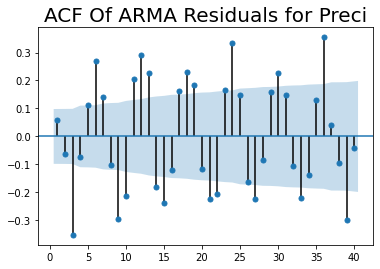

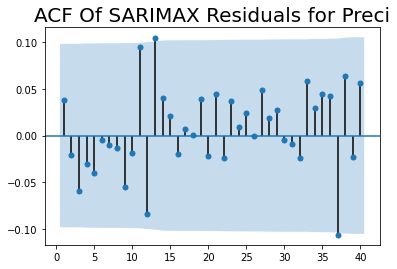

In [215]:
sgt.plot_acf(df_arma_resid['Preci'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Preci",size=20)
plt.show()

sgt.plot_acf(df_sarimax_resid['Preci'], zero = False, lags = 40)
plt.title("ACF Of SARIMAX Residuals for Preci",size=20)
plt.show()

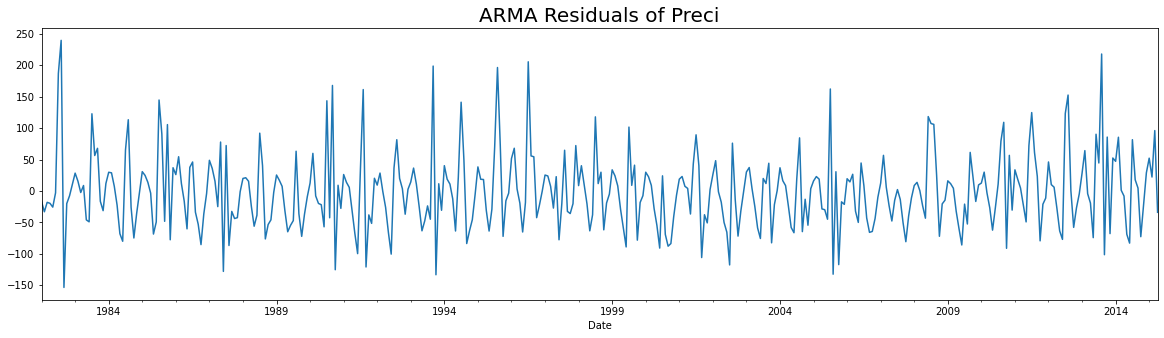

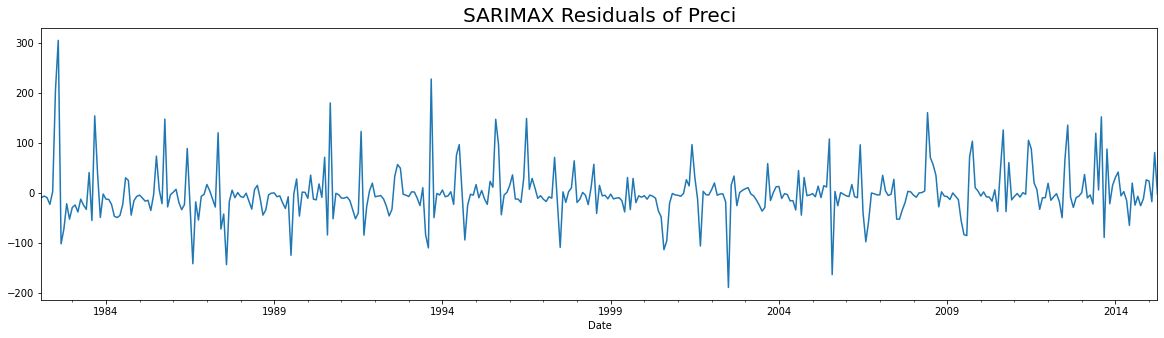

In [216]:
df_arma_resid['Preci'].plot(figsize=(20,5))
plt.title("ARMA Residuals of Preci",size=20)
plt.show()

df_sarimax_resid['Preci'].plot(figsize=(20,5))
plt.title("SARIMAX Residuals of Preci",size=20)
plt.show()

# Test

In [217]:
df_test.iloc[42]

Preci    0.0
Name: 2018-11-01 00:00:00, dtype: float64

In [218]:
df_test.index

DatetimeIndex(['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
     

In [219]:
df_test.loc[('2019-12-1')]['Preci']

0.22

In [226]:
df_test['Temp_Min_Predicted'] = [temp_min_model.predict(index).get(0) for index in df_test.index]
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Preci,Temp_Min_Predicted
Date,,
2015-05-01,24.77,27.726579
2015-06-01,76.49,29.491412
2015-07-01,231.20,27.003230
2015-08-01,160.42,25.328855
2015-09-01,91.55,23.192752


In [253]:
print(df_test.index[0], df_test.index[-1])

2015-05-01 00:00:00 2019-12-01 00:00:00


In [256]:
actuals = [df_test.loc[i]['Preci'] for i in df_test.index]
predictions = results_sarimax_10.predict('2015-05-01', '2019-12-01', exog = df_test['Temp_Min_Predicted'].values.reshape(56,1))

In [257]:
from sklearn.metrics import r2_score

In [258]:
r2_score(actuals, predictions)

0.1278697285324547

In [260]:
df_pred = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])
df_pred['Date'] = df_test.index
df_pred['Actual'] = actuals
df_pred['Predicted'] = [item for item in results_sarimax_2.forecast(56)]
df_pred

,Date,Actual,Predicted
0,2015-05-01,24.77,25.137573
1,2015-06-01,76.49,84.820777
2,2015-07-01,231.20,207.137512
3,2015-08-01,160.42,213.578821
4,2015-09-01,91.55,126.652894
5,2015-10-01,18.27,34.797631
6,2015-11-01,0.09,13.200956
7,2015-12-01,5.52,14.906053
8,2016-01-01,4.28,19.462249
9,2016-02-01,0.07,20.923852
